# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.14499999675899744


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [6]:
def ddpg(agent ,n_episodes=5000, max_t=2000):
    all_scores = []
    scores_window = deque(maxlen=100)
    
    for i_episode in range(1, n_episodes+1):
        
        agent.reset()
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        while True:
            actions = agent.act(states) # select an action (for each agent)
            actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            agent.step(states,actions,rewards,next_states,dones)
            scores += env_info.rewards                         # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break
        
        print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))        
        avg_score = np.mean(scores)
        scores_window.append(avg_score)
        all_scores.append(avg_score)
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break 
            
    return all_scores

In [7]:
# Uncomment to run DDPG
'''
from ddpg.ddpg_agent import *
config = Config(state_size,action_size,2,num_agents)    
agent = DDPG(config)
scores = ddpg(agent, n_episodes = 2000)'''

'\nfrom ddpg.ddpg_agent import *\nconfig = Config(state_size,action_size,2,num_agents)    \nagent = DDPG(config)\nscores = ddpg(agent, n_episodes = 2000)'

In [ ]:
from ppo.actor_critic import *
from ppo.agent import *

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
from torch.distributions import MultivariateNormal
import numpy as np


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

class ActorCritic(nn.Module):

    def __init__(self,state_size,action_size):
        super(ActorCritic,self).__init__()

        

        self.actor = nn.Sequential(
            nn.Linear(state_size,256),
            nn.ReLU(inplace = True),
            nn.Linear(256,128),
            nn.ReLU(inplace = True),
            nn.Linear(128,action_size),
            nn.Tanh()
        )

        self.critic = nn.Sequential(
            nn.Linear(state_size,256),
            nn.ReLU(inplace = True),
            nn.Linear(256,128),
            nn.ReLU(inplace = True),
            nn.Linear(128,1)
        )
        
        self.action_size = action_size
        
        self.std = nn.Parameter(torch.zeros(action_size))

        self.actor = self.actor.to(device)
        self.critic = self.critic.to(device)


    def forward(self):
        raise NotImplementedError

    def act(self,states,memory,t):
                
        action_mean = self.actor(states)
            
        dist = torch.distributions.Normal(action_mean, F.softplus(self.std.to(device)))
        actions = dist.sample() # --> 20 ,4
        log_prob = dist.log_prob(actions).sum(dim = -1).unsqueeze(-1) #--> 20, 1
        log_prob = torch.sum(log_prob, dim=-1) # --> 20,1
        
        for idx,(state,action,l_prob) in enumerate(zip(states,actions,log_prob)):
            memory.states[t,idx,:] = state.cpu().data.numpy() # [33]
            memory.actions[t,idx,:] = action.cpu().data.numpy()# [4] 
            memory.logprobs[t,idx] = l_prob.cpu().data.numpy()# [1]
        
        return actions.detach()

    def evaluate(self, state ,action):
        
        action_mean = self.actor(state)
        dist = torch.distributions.Normal(action_mean, F.softplus(self.std.to(device)))
        log_prob = dist.log_prob(action).sum(dim = -1) # [1]
        entropy = dist.entropy().sum(-1) # [1]
        return log_prob, self.critic(state).squeeze(-1), entropy
    
    def find_state_value(self,state):
        return self.critic(state)



cpu


In [6]:
def random_sample(indices, batch_size):
    indices = np.asarray(np.random.permutation(indices))
    batches = indices[:len(indices) // batch_size * batch_size].reshape(-1, batch_size)
    for batch in batches:
        yield batch
    r = len(indices) % batch_size
    if r:
        yield indices[-r:]

In [7]:
import torch
import torch.nn as nn 
import torch.nn.functional as F 
import numpy as np 
import random
 

SGD_EPOCH = 10              
GAMMA = 0.99 
gradient_clip= 5
BETAS = (0,0)
LR = 3e-4        
BATCH_SIZE = 128

class Memory:
    def __init__(self):
        self.initialize_zeros()
        
    def initialize_zeros(self,MAX_T = 1000 ,num_agent = 20 , action_size = 4, state_size = 33):
        self.actions = np.zeros((MAX_T, num_agent ,action_size))
        self.states = np.zeros((MAX_T, num_agent ,state_size))
        self.logprobs = np.zeros((MAX_T, num_agent))
        self.rewards = np.zeros((MAX_T, num_agent))
        self.is_terminals = np.zeros((MAX_T, num_agent))
    def clear_memory(self):
        
        self.initialize_zeros()
        

class PPO:
    def __init__(self, state_size , action_size):
        self.policy = ActorCritic(state_size, action_size)
        self.optimizer = torch.optim.Adam(self.policy.parameters(), lr = LR, betas = BETAS)
        self.policy_old = ActorCritic(state_size, action_size)
        
        self.policy_old.load_state_dict(self.policy.state_dict())
        self.memory = Memory()
        self.step_t = 0

        self.MseLoss = nn.MSELoss()


    def act(self, state, t):
        state = torch.FloatTensor(state.reshape(20,-1)).to(device)
        return self.policy_old.act(state,self.memory,t).cpu().data.numpy().flatten()


    def collect_trajectories(self,rewards,dones,t):
        
        '''
        After each step we will have, for each agent
        state : [33]
        action : [4]
        l_prob : [1]
        reward : [1]
        is_terminal : [1]
        
        for 20 agents,
        state : [20,33]
        action : [20,4]
        l_prob : [20,1]
        reward : [20,1]
        is_terminal : [20,1]
        
        --> next find_advantage. 
        
        '''
        
        count = 0
        for idx ,(reward,done) in enumerate(zip(rewards,dones)):
            self.memory.rewards[t,idx] = reward#[1]
            self.memory.is_terminals[t,idx] = done #[1]
              
        
        
    def find_advantage(self,states,rewards,dones):
        
        '''
        Find advantage for each state,action,reward tuple
        
        The entire memory for a horizon of length T will be:
        
        state : [T,20,33]
        action : [T,20,4]
        l_prob : [T,20,1]
        reward : [T,20,1]
        is_terminal : [T,20,1]
        '''
        
        T = states.size(0)
        advantages = np.zeros((T,20))
        returns = np.zeros((T,20))

        
        for idx in range(20):
            ret = self.policy_old.find_state_value(states[T-1,idx,:]).squeeze(-1).detach()
            returns[T-1,idx] = ret
            for i in reversed(range(T-1)):
                ret = rewards[i,idx] + GAMMA * (1 - dones[i,idx]) * ret
                state = states[i,idx,:] # T,33
                state_value = self.policy_old.find_state_value(state).squeeze(-1).detach() # T,
                advantages[i,idx] = ret - state_value
                returns[i,idx] = ret
                
        return torch.from_numpy(advantages).to(device),torch.from_numpy(returns).to(device)
            

    def step(self,epsilon,beta):
        self.learn(epsilon ,beta)
        self.memory.clear_memory()
        

    def learn(self, epsilon, beta):
        
        states = torch.from_numpy(self.memory.states).float().to(device).detach()
        actions = torch.from_numpy(self.memory.actions).float().to(device).detach()
        rewards = torch.from_numpy(self.memory.rewards).float().to(device).detach()    
        is_terminals = torch.from_numpy(self.memory.is_terminals.astype(np.uint8)).float().to(device).detach()
        old_probs = torch.from_numpy(self.memory.logprobs).float().to(device).detach()            
            
        advantages,returns = self.find_advantage(states,rewards,is_terminals)
        
        advantages = (advantages - advantages.mean())/advantages.std()
            
            
        
        for _ in range(SGD_EPOCH):
            sampler = random_sample(np.arange(states.size(0)), BATCH_SIZE)
            for batch_indices in sampler:
                batch_indices = torch.tensor(batch_indices).long()
                sampled_states = states[batch_indices] # BATCH * 33
                sampled_actions = actions[batch_indices] # BATCH * 4
                sampled_log_probs_old = old_probs[batch_indices] # BATCH,
                sampled_advantages = advantages[batch_indices] # BATCH,
                sampled_returns = returns[batch_indices]
                
                logprobs, state_values, dist_entropy = self.policy.evaluate(sampled_states,sampled_actions)
                
                ratios = torch.exp(logprobs - sampled_log_probs_old)
                
            
                surr1 = sampled_advantages * ratios
                surr2 = torch.clamp(ratios,1 - epsilon , 1+ epsilon) * sampled_advantages 
                                
                loss1 =  torch.min(surr1,surr2)
                loss2 = self.MseLoss(sampled_returns , state_values)
                loss3 = beta * dist_entropy
            
                
                loss = - loss1.mean() + loss2 - loss3.mean()

                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

        self.policy_old.load_state_dict(self.policy.state_dict())


In [8]:
agent = PPO(state_size,action_size)
from collections import deque

In [9]:
def ppo(agent ,n_episodes=5000, max_t=1000):
    all_scores = []
    scores_window = deque(maxlen=100)
    
    eps_clip = 0.1
    beta = 0.01
    
    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        state = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        for p in range(max_t):
            action = agent.act(state,p) # select an action (for each agent)
            env_info = env.step(action)[brain_name]           # send all actions to tne environment
            next_state = env_info.vector_observations         # get next state (for each agent)
            reward = env_info.rewards                      # get reward (for each agent)
            done = env_info.local_done                        # see if episode finished
            agent.collect_trajectories(reward,done,p)
            scores += env_info.rewards                         # update the score (for each agent)
            state = next_state                               # roll over states to next time step
            if np.any(done):                                  # exit loop if episode finished
                break
             
        
        agent.step(eps_clip,beta)
        
        print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))        
        avg_score = np.mean(scores)
        scores_window.append(avg_score)
        all_scores.append(avg_score)
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            
            torch.save(agent.policy.state_dict(), 'checkpoint_ppo_30.pth')
            break 
            
    return all_scores

In [10]:
scores = ppo(agent , n_episodes = 1000)

Total score (averaged over agents) this episode: 0.5279999881982803
Episode 1	Average Score: 0.53Total score (averaged over agents) this episode: 0.5429999878630042
Episode 2	Average Score: 0.54Total score (averaged over agents) this episode: 0.7179999839514494
Episode 3	Average Score: 0.60Total score (averaged over agents) this episode: 0.7659999828785657
Episode 4	Average Score: 0.64Total score (averaged over agents) this episode: 0.518999988399446
Episode 5	Average Score: 0.61Total score (averaged over agents) this episode: 0.43199999034404757
Episode 6	Average Score: 0.58Total score (averaged over agents) this episode: 0.6134999862872064
Episode 7	Average Score: 0.59Total score (averaged over agents) this episode: 0.8424999811686575
Episode 8	Average Score: 0.62Total score (averaged over agents) this episode: 0.6139999862760306
Episode 9	Average Score: 0.62Total score (averaged over agents) this episode: 0.7984999821521341
Episode 10	Average Score: 0.64Total score (averaged over ag

Text(0,0.5,'Scores')

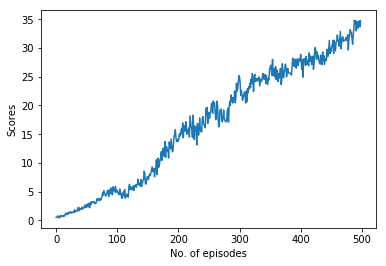

In [12]:
import matplotlib.pyplot as plt
plt.plot(scores)
plt.xlabel("No. of episodes")
plt.ylabel("Scores")
